In [366]:
import pandas as pd
import chardet
import re
import statsmodels.api as sm
from sklearn import linear_model
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import scipy as sci
from pandas.tools.plotting import bootstrap_plot
skl_linmod = linear_model.LinearRegression()

from sklearn.utils import resample as resample
import math

#Préparation des données
#####données1: https://www.data.gouv.fr/fr/datasets/depenses-d-assurance-maladie-hors-prestations-hospitalieres-par-caisse-primaire-departement/ (fichier R 2014 sans libélés & fichier descriptif_table_R pour l'explication des variables)
#####données 2 :http://www.data.drees.sante.gouv.fr/ReportFolders/reportFolders.aspx?IF_ActivePath=P,490,497,514 (tableau 7)

In [54]:
filePath = "./data/rpps-medecin-tab7-densite-2013-14-15-v1_27501082545774.csv"
#skiprows = [0,1,2,3,5,6,7]
skiprows = range(4) + range(5,8)
nrows=5

In [55]:
data = pd.read_csv(filePath, nrows=nrows, skiprows=skiprows)
print data.head(2)

  SPECIALITE  Ensemble des sp�cialit�s d'exercice  Sp�cialistes  \
0     Alsace                                356.9         198.2   
1  Aquitaine                                354.3         184.2   

   Anatomie et cytologie pathologiques  Anesth�sie-r�animation  \
0                                  2.0                    19.9   
1                                  2.8                    17.9   

   Biologie m�dicale  Cardiologie et maladies vasculaires  Chirurgie g�n�rale  \
0                3.9                                 12.1                 7.1   
1                4.9                                 11.8                 5.2   

   Chirurgie maxillo-faciale et stomatologie  \
0                                        0.8   
1                                        1.6   

   Chirurgie orthop�dique et traumatologie        ...          Pneumologie  \
0                                      5.1        ...                  4.5   
1                                      5.3        ... 

In [56]:
columns = data.columns
print chardet.detect(" ".join(columns))

{'confidence': 0.8841952448101613, 'encoding': 'ISO-8859-2'}


In [57]:
data = pd.read_csv(filePath, nrows=nrows, skiprows=skiprows, encoding="iso-8859-2")
print data.head(2)

  SPECIALITE  Ensemble des spécialités d'exercice  Spécialistes  \
0     Alsace                                356.9         198.2   
1  Aquitaine                                354.3         184.2   

   Anatomie et cytologie pathologiques  Anesthésie-réanimation  \
0                                  2.0                    19.9   
1                                  2.8                    17.9   

   Biologie médicale  Cardiologie et maladies vasculaires  Chirurgie générale  \
0                3.9                                 12.1                 7.1   
1                4.9                                 11.8                 5.2   

   Chirurgie maxillo-faciale et stomatologie  \
0                                        0.8   
1                                        1.6   

   Chirurgie orthopédique et traumatologie        ...          Pneumologie  \
0                                      5.1        ...                  4.5   
1                                      5.3        ... 

In [59]:
df = pd.DataFrame(data)
df

,SPECIALITE,Ensemble des spécialités d'exercice,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,...,Pneumologie,Psychiatrie,Radio-diagnostic et imagerie médicale,Radio-thérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale
0,Alsace,356.9,198.2,2.0,19.9,3.9,12.1,7.1,0.8,5.1,...,4.5,21.7,15.5,1.5,0.9,0.1,3.5,2.3,158.7,158.7
1,Aquitaine,354.3,184.2,2.8,17.9,4.9,11.8,5.2,1.6,5.3,...,3.5,25.5,14.5,1.3,0.2,0.0,3.0,2.5,170.1,170.1
2,Auvergne,308.4,155.5,2.3,16.0,3.6,8.8,5.4,0.7,4.3,...,3.3,18.5,11.0,1.7,0.7,0.0,4.0,2.5,152.9,152.9
3,Basse-Normandie,300.6,150.1,1.8,14.1,3.5,8.9,5.7,2.0,4.3,...,4.3,16.0,11.1,1.5,0.3,0.0,3.4,1.8,150.5,150.5
4,Bourgogne,288.0,147.9,1.6,14.3,3.8,8.8,4.5,1.0,5.4,...,4.5,16.6,10.1,1.0,0.4,0.0,2.8,2.5,140.1,140.1


In [75]:
filePath = "./data/R_2014_sans_lib/R201401_sanslib.CSV"
data = pd.read_csv(filePath, nrows=nrows)
print data

                                                                          cpam;SERIE;prs_nat;sns_date;asu_nat;cpl_cod;ben_qlt;REM_TAU;pre_spe;pre_spe1;pre_stj1;exe_spe;exe_spe1;exe_stj1;top_slm;rem_mon;rec_mon;dep_mon;act_dnb;act_coe
342;111111;1111;201001;1;0;1;30;1;1;1;1;11;1;1;6   60;22  00;0  00;1;1                                                    0                                                                                                              
451;111111;1111;201001;1;0;1;30;1;1;1;1;11;1;1;-6  60;-22 00;0  00;-1;-1                                                  0                                                                                                              
597;111111;1111;201001;1;0;1;30;1;1;1;1;11;1;1;-6  60;-22 00;0  00;-1;-1                                                  0                                                                                                              
599;111111;1111;201001;1;0;1;30;1;1;1;1;11;1;1;-13 20;-44 00;0  

In [76]:
data = pd.read_csv(filePath, sep=';', nrows=nrows)
print data.head(2)

   cpam   SERIE  prs_nat  sns_date  asu_nat  cpl_cod  ben_qlt  REM_TAU  \
0   342  111111     1111    201001        1        0        1       30   
1   451  111111     1111    201001        1        0        1       30   

   pre_spe  pre_spe1  pre_stj1  exe_spe  exe_spe1  exe_stj1  top_slm rem_mon  \
0        1         1         1        1        11         1        1    6,60   
1        1         1         1        1        11         1        1   -6,60   

  rec_mon dep_mon  act_dnb act_coe  
0   22,00    0,00        1    1,00  
1  -22,00    0,00       -1   -1,00  


In [77]:
data = pd.read_csv(filePath, sep=';', nrows=nrows, decimal=',')
print data.head(2)

   cpam   SERIE  prs_nat  sns_date  asu_nat  cpl_cod  ben_qlt  REM_TAU  \
0   342  111111     1111    201001        1        0        1       30   
1   451  111111     1111    201001        1        0        1       30   

   pre_spe  pre_spe1  pre_stj1  exe_spe  exe_spe1  exe_stj1  top_slm  rem_mon  \
0        1         1         1        1        11         1        1      6.6   
1        1         1         1        1        11         1        1     -6.6   

   rec_mon  dep_mon  act_dnb  act_coe  
0       22        0        1        1  
1      -22        0       -1       -1  


In [78]:
df = pd.DataFrame(data)
col = data.columns.tolist()
#print df[[col[0], col[1]]].head(5)
#df.loc[0:3,col[0]:col[2]]
df

,cpam,SERIE,prs_nat,sns_date,asu_nat,cpl_cod,ben_qlt,REM_TAU,pre_spe,pre_spe1,pre_stj1,exe_spe,exe_spe1,exe_stj1,top_slm,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,342,111111,1111,201001,1,0,1,30,1,1,1,1,11,1,1,6.60,22.00,0.00,1,1
1,451,111111,1111,201001,1,0,1,30,1,1,1,1,11,1,1,-6.60,-22.00,0.00,-1,-1
2,597,111111,1111,201001,1,0,1,30,1,1,1,1,11,1,1,-6.60,-22.00,0.00,-1,-1
3,599,111111,1111,201001,1,0,1,30,1,1,1,1,11,1,1,-13.20,-44.00,0.00,-2,-2
4,611,111111,1111,201001,1,0,1,30,1,1,1,1,11,1,1,0.13,0.43,84.57,1,1


#Dépassements d'honoraires mois de janvier

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def set_pathR(year, month):
    PathRFormat = "./data/R_2014_sans_lib/R{year}{month}_sanslib.CSV"
    PathR = PathRFormat.format(month=month, year=year)
    return PathR
    
PathR = set_pathR("2014", "01")
print PathR

./data/R_2014_sans_lib/R201401_sanslib.CSV


In [26]:
def getdfR(filePath, usecols, nrows):
    dataR = pd.read_csv(filePath, sep=';', usecols=usecols, decimal=',', thousands='.', nrows=nrows)
    dfR = pd.DataFrame(dataR)
    return dfR

nrows = None
usecols = ["cpam", "exe_spe", "exe_spe1", "dep_mon"]
dfR = getdfR(PathR, usecols, nrows)
dfR.head(2) 

#dfR["dep_mon"].unique()

,cpam,exe_spe,exe_spe1,dep_mon
0,342,1,11,0
1,451,1,11,0


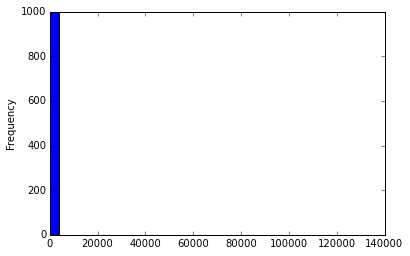

In [28]:
dfR['dep_mon'].sample(1000).plot(kind='hist', bins=30)

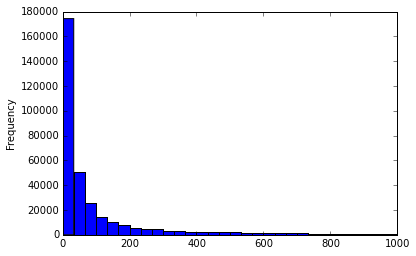

In [29]:
dfR = dfR.loc[(dfR["dep_mon"] > 0) & (dfR["dep_mon"] < 1000)]
dfR['dep_mon'].plot(kind='hist', bins=30)

In [194]:
def getGroupNormalized(varGroup, varToGroup):
    df = dfR[[varGroup, varToGroup]].groupby(varGroup).aggregate(['sum', 'mean', 'count'])#.astype(float)
    df = df[varToGroup]
    div_df = df.copy(deep=True)
    div_df.loc[:,:] = 0
    div_df.loc[:,'sum'] = df.loc[:,'sum'].sum()
    div_df.loc[:,'mean'] = df.loc[:,'mean'].sum()
    div_df.loc[:,'count'] = df.loc[:,'count'].sum()
    return df.div(div_df)

dep_mon_grouby_exe_spe1 = getGroupNormalized('exe_spe1', 'dep_mon')
dep_mon_grouby_exe_spe1.head(3)

,sum,mean,count
exe_spe1,,,
11,0.099134,0.098834,0.108493
12,0.704365,0.116371,0.654692
30,0.001268,0.010365,0.013231


In [84]:
def getDescriptionVariable(variable):
    descriptifPath = "./data/descriptif_table_R.xls"
    data_desc = pd.read_excel(descriptifPath, sep=';',sheetname=variable)
    df_desc = pd.DataFrame(data_desc).set_index(variable)
    return df_desc

df_exe_spe1 = getDescriptionVariable('exe_spe1')
df_exe_spe1.head(2)

,l_exe_spe1
exe_spe1,
11,Médecins Omnipraticiens
12,Médecins Spécialistes


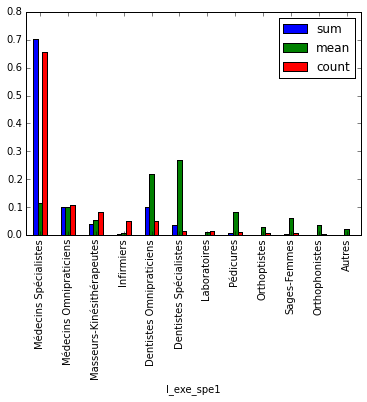

In [192]:
pd.concat([df_exe_spe1, dep_mon_grouby_exe_spe1], axis=1).set_index('l_exe_spe1') \
.sort_values(by='count', ascending=False).plot(kind='bar')

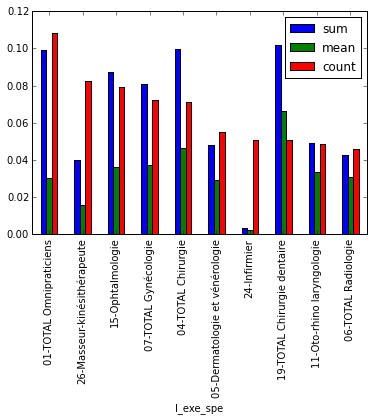

In [200]:
dep_mon_grouby_exe_spe = getGroupNormalized('exe_spe', 'dep_mon')
df_exe_spe = getDescriptionVariable('exe_spe')
df_exe_spe =pd.concat([df_exe_spe, dep_mon_grouby_exe_spe], axis=1).set_index('l_exe_spe'). \
                       sort_values(by='count', ascending=False)
df_exe_spe[0:10].plot(kind='bar')

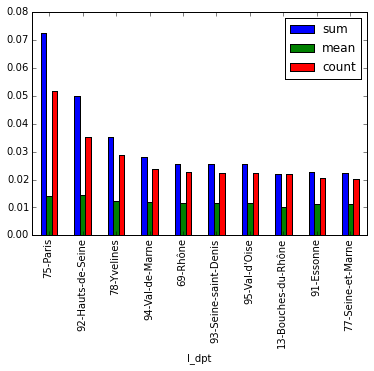

In [293]:
def getLexiqueVariable(varfile, varIndex, varCol):
    lexiquePath = "./data/Lexique_tables_R/{varfile}".format(varfile=varfile)
    data_lex = pd.read_csv(lexiquePath, sep=';', encoding="latin-1")
    df_lex = pd.DataFrame(data_lex).set_index(varIndex)
    return df_lex[varCol]

dep_mon_grouby_cpam = getGroupNormalized('cpam', 'dep_mon')
df_cpam = getLexiqueVariable('cpam.csv', 'cpam', 'l_dpt')

df_cpam = pd.concat([df_cpam, dep_mon_grouby_cpam], axis=1) \
                    .sort_values(by='count', ascending=False)
df_cpam.set_index('l_dpt')[0:10].plot(kind='bar')
#df_cpam

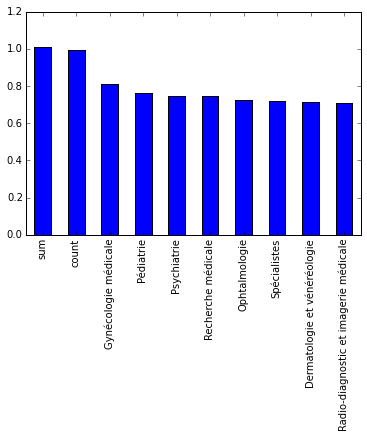

In [389]:
def getdfDensity(filePath, varIndex, skiprows, nrows):
    data = pd.read_csv(filePath, nrows=nrows, skiprows=skiprows, encoding="latin-1")
    df = pd.DataFrame(data)
    #df['SPECIALITE'] = df['SPECIALITE'].str.replace(' ','')
    #df['SPECIALITE'] = df['SPECIALITE'].str.replace(r'(^[0-9]{1,3}-)|(^[0-9][A,B]-)','')
    df['SPECIALITE'] = df['SPECIALITE'].str \
                      .replace(r'(\s\-\s)[a-zA-Z\-\s(\xe8)(\xf4)(\x92)(\xe9)]{2,40}','')
    df['SPECIALITE'] = df['SPECIALITE'].str.replace(r'(^0)','')
    df = df.set_index(varIndex).sort_index()
    df.index.names = ['dpt']
    return df

filePath = "./data/rpps-medecin-tab7-densite-2013-14-15-v1_32819236599579.csv"
skiprows = range(4) + range(5,8) + range(8,35)
nrows = None
df_density = getdfDensity(filePath, 'SPECIALITE', skiprows, nrows)
dep_mon_grouby_cpam = getGroupNormalized('cpam', 'dep_mon')
df_cpam = getLexiqueVariable('cpam.csv', 'cpam', ['l_dpt', 'dpt'])
df_cpam = pd.concat([df_cpam, dep_mon_grouby_cpam], axis=1)
df_cpam = df_cpam.set_index('l_dpt')
df_cpam = df_cpam.groupby(['dpt']).sum()
df = pd.concat([df_cpam, df_density], axis=1, join_axes=[df_density.index])
#df.head(3)
columns = df.columns.tolist()
df = preprocessing.StandardScaler().fit_transform(df)
df = pd.DataFrame(df, columns=columns)
#df
cov_sum = df.cov()['sum'].sort_values(ascending=False)[0:10]
cov_sum.plot(kind='bar')

#cov_sum

#df_density.index.tolist()
#print df_density.shape, df_cpam.shape
#df_cpam['l_dpt'].tolist()
#df_cpam.set_index('l_dpt')[0:10].plot(kind='bar')
#df_cpam.index.tolist()
#df_cpam#.head(3)
#df_cpam['sum'].sum()

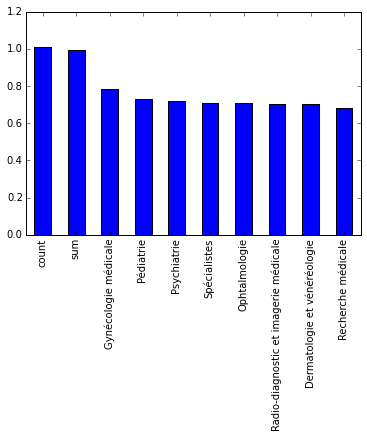

In [388]:
cov_count = df.cov()['count'].sort_values(ascending=False)[0:10]
cov_count.plot(kind='bar')

In [ ]:
def diff(list1, list2):
    c = set(list1).union(set(list2))
    d = set(list1).intersection(set(list2))
    return list(c - d)

from collections import Counter
def diff2(list1, list2):
    c1 = Counter(list1)
    c2 = Counter(list2)
    return list((c1 - c2).elements())
#print set([1, 2]) - set([2, 3])
#print set([3, 2]) - set([2, 1])
#list(set(temp1) - set(temp2))
#print set(df_density.index.tolist()) - set(df_cpam.index.tolist())
list2 = df_density.index.tolist()
list1 = df_cpam.index.tolist()
#print diff2(list1, list2)
#print [x for x in df_cpam.index.tolist() if x not in df_density.index.tolist()]

In [377]:
columns = df.columns.tolist()
columns
df = preprocessing.StandardScaler().fit_transform(df)

#pd.DataFrame(df, columns=columns)
#df
#df.cov()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'